In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats
from scipy.stats import gaussian_kde

### Synthetic example

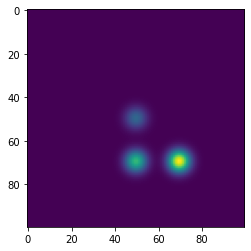

In [3]:
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))
scalar = x1[None, :]*x1[:, None] + 2*x1[None, :]*x2[:, None] + 3*x2[None, :]*x2[:, None]
plt.imshow(scalar)
plt.show()

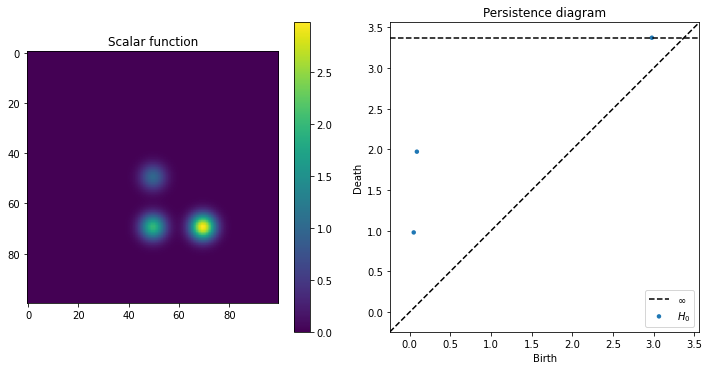

In [4]:
dgm = lower_star_img(-scalar)
dgm[~np.isinf(dgm)] = -dgm[~np.isinf(dgm)]
dgm[~np.isinf(dgm).any(axis=1)] = np.flip(dgm[~np.isinf(dgm).any(axis=1)])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(scalar)
plt.colorbar()
plt.title("Scalar function")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("Persistence diagram")
plt.tight_layout()
plt.show()

### 311 noise complaints example

In [5]:
df = pd.read_csv('data/0.1.csv')
df.head()
m1 = df[['Points:0','Points:1']]
print(m1)

       Points:0  Points:1
0        4.6209  0.101700
1        4.6209  0.100156
2        4.6209  0.095568
3        4.6209  0.088077
4        4.6209  0.077909
...         ...       ...
50573    8.6383  0.259460
50574    9.6178  0.225280
50575    9.7642  0.592210
50576    8.9488  0.462320
50577    8.1778  0.317260

[50578 rows x 2 columns]


In [6]:
m1 = df[['Points:0','Points:1']].to_numpy()[:,0]
m2 = df[['Points:0','Points:1']].to_numpy()[:,1]
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

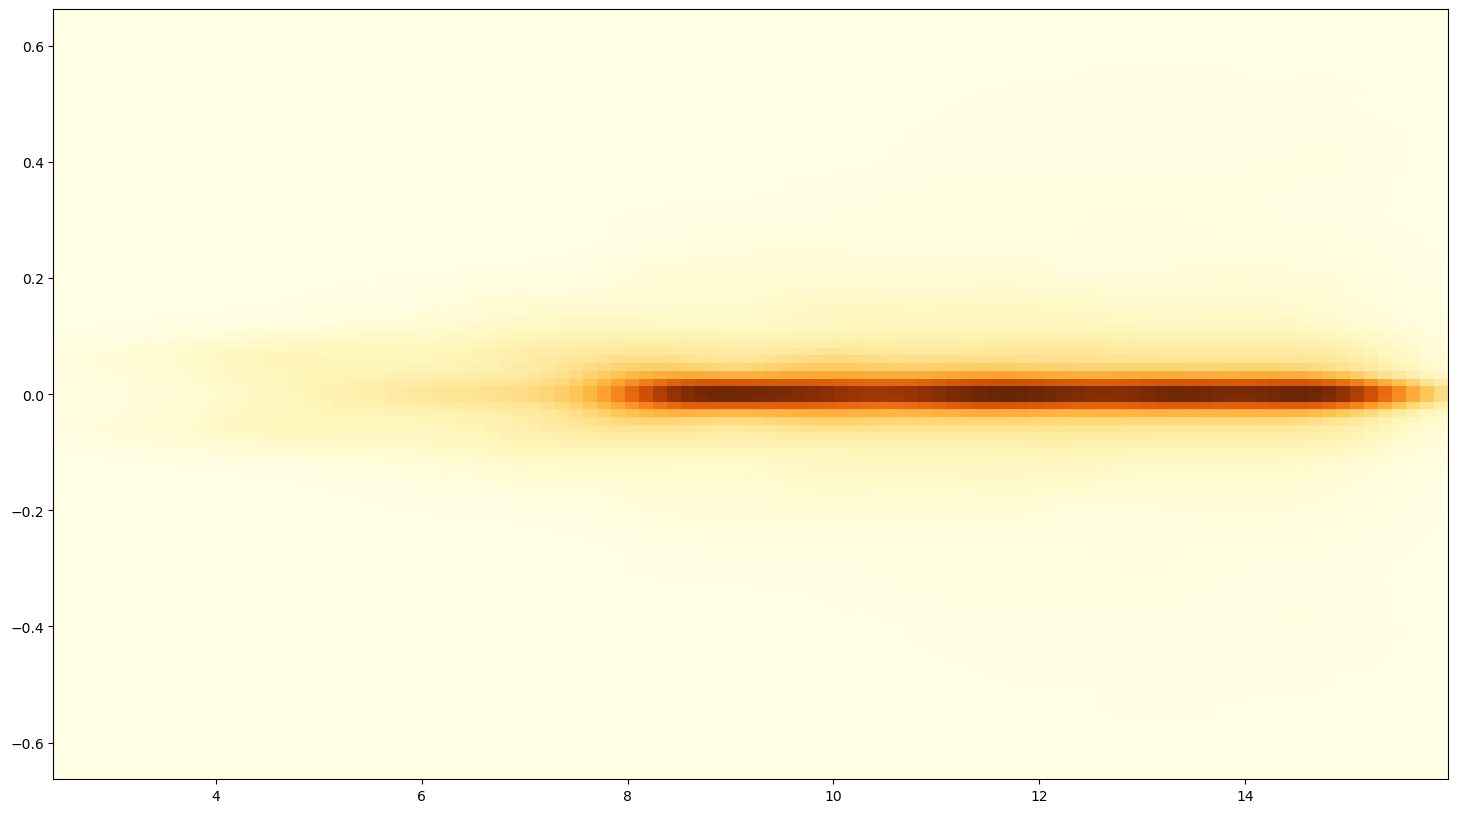

In [7]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(np.rot90(Z), cmap=plt.cm.YlOrBr, extent=[xmin, xmax, ymin, ymax], aspect='auto')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

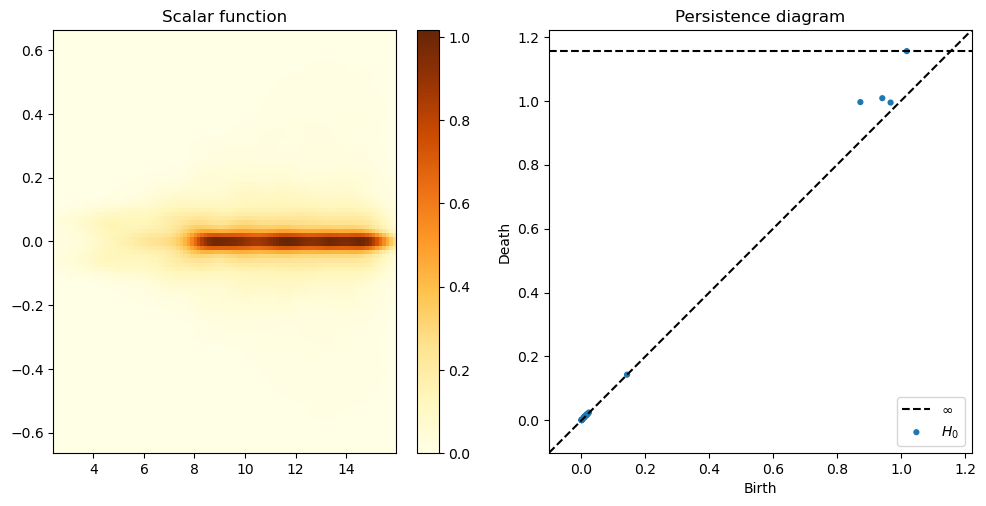

In [8]:
dgm = lower_star_img(-Z)
dgm[~np.isinf(dgm)] = -dgm[~np.isinf(dgm)]
dgm[~np.isinf(dgm).any(axis=1)] = np.flip(dgm[~np.isinf(dgm).any(axis=1)])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.rot90(Z), cmap=plt.cm.YlOrBr, extent=[xmin, xmax, ymin, ymax], aspect='auto')
plt.colorbar()
plt.title("Scalar function")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("Persistence diagram")
plt.tight_layout()
plt.show()

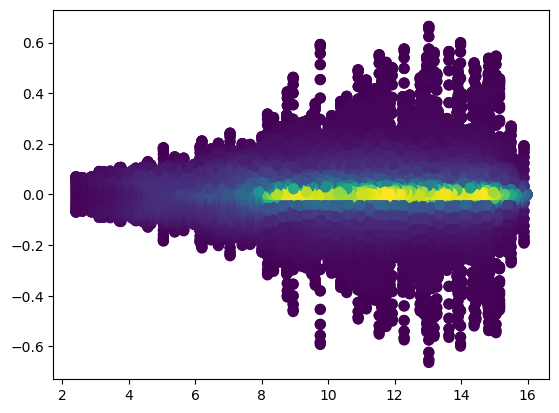

In [11]:
# Generate fake data
x = df['Points:0'].to_numpy()
y = df['Points:1'].to_numpy()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


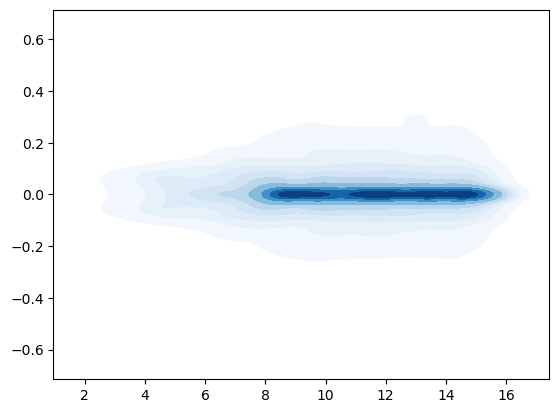

In [14]:
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=False)

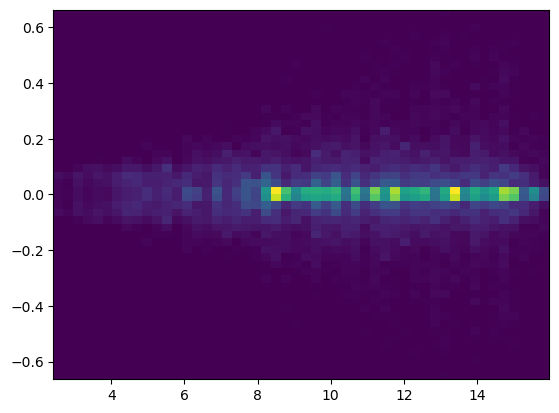

In [33]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.show()

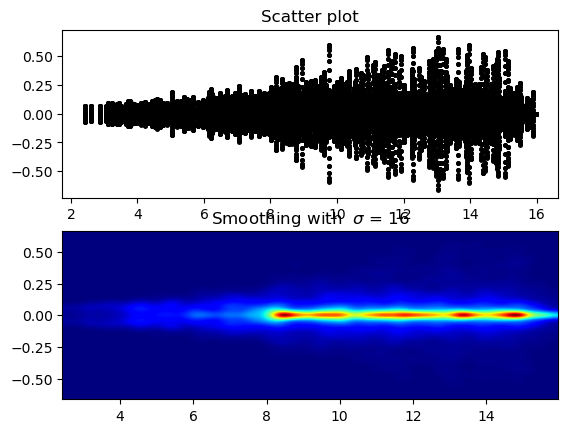

In [36]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 1)

# # Generate some test data
# x = np.random.randn(1000)
# y = np.random.randn(1000)

sigmas = [0, 16]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet, aspect='auto')
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()